In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('/Users/kyledang/Documents/Development/Projects/UFC-Fight-Predictor/ufc-master.csv')

## Selecting Relevant Columns

- **Fighter Stats**: `RedWins`, `RedLosses`, `RedCurrentWinStreak`, `BlueWins`, `BlueLosses`, `BlueCurrentWinStreak`
- **Performance Metrics**: `RedAvgSigStrLanded`, `BlueAvgSigStrLanded`, `RedAvgTDLanded`, `BlueAvgTDLanded`
- **Fight Metadata**: `Date`, `Location`, `Country`, `TitleBout`, `WeightClass`
- **Betting Data**: `RedOdds`, `BlueOdds`, `RedExpectedValue`, `BlueExpectedValue`, `RedDecOdds`, `BlueDecOdds`, `RKOOdds`, `BKOOdds`
- **Physical Attributes**: `RedHeightCms`, `BlueHeightCms`, `RedWeightLbs`, `BlueWeightLbs`, `RedReachCms`, `BlueReachCms`
- **Target Variable**: `Winner`

In [5]:
columns_to_keep = [
    'RedFighter', 'BlueFighter', 'RedWins', 'RedLosses', 'RedCurrentWinStreak',
    'BlueWins', 'BlueLosses', 'BlueCurrentWinStreak',
    'RedAvgSigStrLanded', 'BlueAvgSigStrLanded',
    'RedAvgTDLanded', 'BlueAvgTDLanded',
    'Date', 'Location', 'Country', 'TitleBout', 'WeightClass',
    'RedOdds', 'BlueOdds', 'RedExpectedValue', 'BlueExpectedValue',
    'RedDecOdds', 'BlueDecOdds', 'RKOOdds', 'BKOOdds',
    'RedHeightCms', 'BlueHeightCms', 'RedWeightLbs', 'BlueWeightLbs',
    'RedReachCms', 'BlueReachCms', 'Winner'
]

data = data[columns_to_keep]
data

,RedFighter,BlueFighter,RedWins,RedLosses,RedCurrentWinStreak,BlueWins,BlueLosses,BlueCurrentWinStreak,RedAvgSigStrLanded,BlueAvgSigStrLanded,...,BlueDecOdds,RKOOdds,BKOOdds,RedHeightCms,BlueHeightCms,RedWeightLbs,BlueWeightLbs,RedReachCms,BlueReachCms,Winner
0,Alex Pereira,Jamahal Hill,6,1,2,7,1,4,5.2300,7.1800,...,650.0,110.0,200.0,193.04,193.04,205,205,200.66,200.66,Red
1,Zhang Weili,Yan Xiaonan,8,2,3,8,2,2,5.6600,4.9700,...,NaN,140.0,NaN,162.56,165.10,115,115,160.02,160.02,Red
2,Justin Gaethje,Max Holloway,8,4,2,21,7,2,6.7800,7.1700,...,250.0,150.0,550.0,180.34,180.34,155,145,177.80,175.26,Blue
3,Charles Oliveira,Arman Tsarukyan,22,9,1,8,2,3,3.3900,3.7900,...,330.0,550.0,130.0,177.80,170.18,155,155,187.96,182.88,Blue
4,Bo Nickal,Cody Brundage,4,0,4,4,5,2,1.6400,1.6200,...,3000.0,150.0,1400.0,185.42,182.88,185,185,193.04,182.88,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6183,Duane Ludwig,Darren Elkins,2,1,0,0,0,0,13.6667,NaN,...,NaN,NaN,NaN,177.80,177.80,170,145,177.80,180.34,Blue
6184,John Howard,Daniel Roberts,3,0,3,0,0,0,18.0000,NaN,...,NaN,NaN,NaN,170.18,177.80,170,170,180.34,187.96,Red
6185,Brendan Schaub,Chase Gormley,0,1,0,0,1,0,12.0000,8.0000,...,NaN,NaN,NaN,193.04,190.50,245,265,198.12,196.00,Red
6186,Mike Pierce,Julio Paulino,1,1,0,0,0,0,40.5000,NaN,...,NaN,NaN,NaN,172.72,182.88,170,170,177.80,185.42,Red


In [6]:
non_numeric_columns = data.select_dtypes(exclude=['number']).columns.tolist()
non_numeric_columns

['RedFighter',
 'BlueFighter',
 'Date',
 'Location',
 'Country',
 'TitleBout',
 'WeightClass',
 'Winner']

## Encoding Non-Numeric Columns as Categorical Codes  

- **`Date`** → `Date_code`
- **`Location`** → `Location_code`
- **`Country`** → `Country_code`
- **`TitleBout`** → `TitleBout_code`
- **`WeightClass`** → `WeightClass_code`

In [8]:
data['Date_code'] = data['Date'].astype('category').cat.codes
data['Location_code'] = data['Location'].astype('category').cat.codes
data['Country_code'] = data['Country'].astype('category').cat.codes
data['TitleBout_code'] = data['TitleBout'].astype('category').cat.codes
data['WeightClass_code'] = data['WeightClass'].astype('category').cat.codes
data

,RedFighter,BlueFighter,RedWins,RedLosses,RedCurrentWinStreak,BlueWins,BlueLosses,BlueCurrentWinStreak,RedAvgSigStrLanded,BlueAvgSigStrLanded,...,RedWeightLbs,BlueWeightLbs,RedReachCms,BlueReachCms,Winner,Date_code,Location_code,Country_code,TitleBout_code,WeightClass_code
0,Alex Pereira,Jamahal Hill,6,1,2,7,1,4,5.2300,7.1800,...,205,205,200.66,200.66,Red,535,68,31,1,5
1,Zhang Weili,Yan Xiaonan,8,2,3,8,2,2,5.6600,4.9700,...,115,115,160.02,160.02,Red,535,68,31,1,12
2,Justin Gaethje,Max Holloway,8,4,2,21,7,2,6.7800,7.1700,...,155,145,177.80,175.26,Blue,535,68,31,0,6
3,Charles Oliveira,Arman Tsarukyan,22,9,1,8,2,3,3.3900,3.7900,...,155,155,187.96,182.88,Blue,535,68,31,0,6
4,Bo Nickal,Cody Brundage,4,0,4,4,5,2,1.6400,1.6200,...,185,185,193.04,182.88,Red,535,68,31,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6183,Duane Ludwig,Darren Elkins,2,1,0,0,0,0,13.6667,NaN,...,170,145,177.80,180.34,Blue,0,26,21,0,6
6184,John Howard,Daniel Roberts,3,0,3,0,0,0,18.0000,NaN,...,170,170,180.34,187.96,Red,0,26,21,0,8
6185,Brendan Schaub,Chase Gormley,0,1,0,0,1,0,12.0000,8.0000,...,245,265,198.12,196.00,Red,0,26,21,0,4
6186,Mike Pierce,Julio Paulino,1,1,0,0,0,0,40.5000,NaN,...,170,170,177.80,185.42,Red,0,26,21,0,8


## Creating the Target Column for Prediction  

- **1**: Red Fighter is the winner
- **0**: Blue Fighter is the winner

In [10]:
data["target"] = (data["Winner"] == "Red").astype("int")
data

,RedFighter,BlueFighter,RedWins,RedLosses,RedCurrentWinStreak,BlueWins,BlueLosses,BlueCurrentWinStreak,RedAvgSigStrLanded,BlueAvgSigStrLanded,...,BlueWeightLbs,RedReachCms,BlueReachCms,Winner,Date_code,Location_code,Country_code,TitleBout_code,WeightClass_code,target
0,Alex Pereira,Jamahal Hill,6,1,2,7,1,4,5.2300,7.1800,...,205,200.66,200.66,Red,535,68,31,1,5,1
1,Zhang Weili,Yan Xiaonan,8,2,3,8,2,2,5.6600,4.9700,...,115,160.02,160.02,Red,535,68,31,1,12,1
2,Justin Gaethje,Max Holloway,8,4,2,21,7,2,6.7800,7.1700,...,145,177.80,175.26,Blue,535,68,31,0,6,0
3,Charles Oliveira,Arman Tsarukyan,22,9,1,8,2,3,3.3900,3.7900,...,155,187.96,182.88,Blue,535,68,31,0,6,0
4,Bo Nickal,Cody Brundage,4,0,4,4,5,2,1.6400,1.6200,...,185,193.04,182.88,Red,535,68,31,0,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6183,Duane Ludwig,Darren Elkins,2,1,0,0,0,0,13.6667,NaN,...,145,177.80,180.34,Blue,0,26,21,0,6,0
6184,John Howard,Daniel Roberts,3,0,3,0,0,0,18.0000,NaN,...,170,180.34,187.96,Red,0,26,21,0,8,1
6185,Brendan Schaub,Chase Gormley,0,1,0,0,1,0,12.0000,8.0000,...,265,198.12,196.00,Red,0,26,21,0,4,1
6186,Mike Pierce,Julio Paulino,1,1,0,0,0,0,40.5000,NaN,...,170,177.80,185.42,Red,0,26,21,0,8,1


In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)

## Splitting the Data into Training and Testing Sets  

- **Training Set**: This subset is used to train the model. It includes all the data where the fight **Date** is earlier than **January 1, 2024**.
- **Testing Set**: This subset is used to evaluate the model's performance. It includes all the data where the fight **Date** is later than **January 1, 2024**.

In [14]:
train = data[data['Date'] < '2024-01-01']
test = data[data['Date'] > '2024-01-01']

## Defining Predictor Variables  

- **Fighter Statistics**: 
  - `RedWins`, `RedLosses`, `RedCurrentWinStreak`:
  - `BlueWins`, `BlueLosses`, `BlueCurrentWinStreak`:
  - `RedAvgSigStrLanded`, `BlueAvgSigStrLanded`:
  - `RedAvgTDLanded`, `BlueAvgTDLanded`:

- **Encoded Categorical Features**: 
  - `Date_code`, `Location_code`, `Country_code`, `TitleBout_code`, `WeightClass_code`:

- **Betting Odds**: 
  - `RedOdds`, `BlueOdds`:
  - `RedExpectedValue`, `BlueExpectedValue`:
  - `RedDecOdds`, `BlueDecOdds`, `RKOOdds`, `BKOOdds`:

- **Physical Attributes**: 
  - `RedHeightCms`, `BlueHeightCms`, `RedWeightLbs`, `BlueWeightLbs`:
  - `RedReachCms`, `BlueReachCms`

In [16]:
predictors = ['RedWins', 'RedLosses', 'RedCurrentWinStreak',
              'BlueWins', 'BlueLosses', 'BlueCurrentWinStreak',
              'RedAvgSigStrLanded', 'BlueAvgSigStrLanded',
              'RedAvgTDLanded', 'BlueAvgTDLanded',
              'Date_code', 'Location_code', 'Country_code', 'TitleBout_code', 'WeightClass_code',
              'RedOdds', 'BlueOdds', 'RedExpectedValue', 'BlueExpectedValue',
              'RedDecOdds', 'BlueDecOdds', 'RKOOdds', 'BKOOdds',
              'RedHeightCms', 'BlueHeightCms', 'RedWeightLbs', 'BlueWeightLbs',
              'RedReachCms', 'BlueReachCms']

In [17]:
rf.fit(train[predictors], train['target'])

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [18]:
preds = rf.predict(test[predictors])

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
acc = accuracy_score(test['target'], preds)

In [21]:
acc

0.63125

In [22]:
combined = pd.DataFrame(dict(actual=test['target'], prediction=preds))

In [23]:
pd.crosstab(index=combined['actual'], columns=combined['prediction'])

prediction,0,1
actual,,
0,35,41
1,18,66


In [24]:
from sklearn.metrics import precision_score

In [25]:
precision_score(test['target'], preds)

0.616822429906542

In [26]:
grouped_data = data.groupby('RedFighter')

In [27]:
group = grouped_data.get_group('Max Holloway')
group

,RedFighter,BlueFighter,RedWins,RedLosses,RedCurrentWinStreak,BlueWins,BlueLosses,BlueCurrentWinStreak,RedAvgSigStrLanded,BlueAvgSigStrLanded,...,BlueWeightLbs,RedReachCms,BlueReachCms,Winner,Date_code,Location_code,Country_code,TitleBout_code,WeightClass_code,target
303,Max Holloway,Chan Sung Jung,20,7,1,7,6,0,7.1700,3.9300,...,145,175.26,182.88,Red,509,64,30,0,2,1
518,Max Holloway,Arnold Allen,19,7,0,10,0,10,7.1700,3.4500,...,145,175.26,177.80,Red,491,65,31,0,2,1
1221,Max Holloway,Yair Rodriguez,18,6,1,8,1,2,7.1700,4.6500,...,145,175.26,180.34,Red,433,68,31,0,2,1
1654,Max Holloway,Calvin Kattar,17,6,0,6,2,2,6.4700,5.0100,...,145,175.26,182.88,Red,395,0,32,0,2,1
2129,Max Holloway,Alexander Volkanovski,17,4,1,7,0,7,NaN,NaN,...,145,175.26,181.61,Blue,352,68,21,1,2,0
2329,Max Holloway,Frankie Edgar,16,4,0,17,6,1,6.6600,3.6000,...,145,175.26,172.72,Red,335,44,3,1,2,1
2485,Max Holloway,Dustin Poirier,16,3,13,16,5,3,85.6316,52.3810,...,155,175.26,182.88,Blue,322,6,21,1,6,0
2646,Max Holloway,Brian Ortega,15,3,12,6,1,6,74.2778,35.5714,...,145,175.26,175.26,Red,309,139,3,1,2,1
3125,Max Holloway,Jose Aldo,14,3,11,8,2,0,68.4118,56.4000,...,145,175.26,177.80,Red,269,40,21,1,2,1
3555,Max Holloway,Anthony Pettis,12,3,9,6,4,1,64.3333,31.2000,...,170,175.26,182.88,Red,231,139,3,1,2,1


### Function: Rolling Averages
The `rolling_averages` function calculates the rolling averages for specified columns within a given group of fight data. It sorts the data by date and computes the mean for the past three fights (excluding the current fight) to smooth out fluctuations and provide a clearer view of performance trends.

In [29]:
def rolling_averages(group, cols, new_cols):
    group = group.sort_values('Date')
    rolling_stats = group[cols].rolling(3, closed='left').mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols)
    return group

## Calculating Rolling Averages for Columns

- **Performance Metrics**: `RedAvgSigStrLanded`, `BlueAvgSigStrLanded`, `RedAvgTDLanded`, `BlueAvgTDLanded`
- **Win/Loss Metrics**: `RedWins`, `RedLosses`, `RedCurrentWinStreak`, `BlueWins`, `BlueLosses`, `BlueCurrentWinStreak`
- **Odds Metrics**: `RedOdds`, `BlueOdds`, `RedExpectedValue`, `BlueExpectedValue`, `RKOOdds`, `BKOOdds`

In [31]:
cols = ['RedAvgSigStrLanded', 'BlueAvgSigStrLanded', 'RedAvgTDLanded', 'BlueAvgTDLanded',
        'RedWins', 'RedLosses', 'BlueWins', 'BlueLosses', 'RedCurrentWinStreak', 'BlueCurrentWinStreak',
        'RedOdds', 'BlueOdds', 'RedExpectedValue', 'BlueExpectedValue', 'RKOOdds', 'BKOOdds']
new_cols = [f'{c}_rolling' for c in cols]
new_cols

['RedAvgSigStrLanded_rolling',
 'BlueAvgSigStrLanded_rolling',
 'RedAvgTDLanded_rolling',
 'BlueAvgTDLanded_rolling',
 'RedWins_rolling',
 'RedLosses_rolling',
 'BlueWins_rolling',
 'BlueLosses_rolling',
 'RedCurrentWinStreak_rolling',
 'BlueCurrentWinStreak_rolling',
 'RedOdds_rolling',
 'BlueOdds_rolling',
 'RedExpectedValue_rolling',
 'BlueExpectedValue_rolling',
 'RKOOdds_rolling',
 'BKOOdds_rolling']

In [32]:
rolling_averages(group, cols, new_cols)

,RedFighter,BlueFighter,RedWins,RedLosses,RedCurrentWinStreak,BlueWins,BlueLosses,BlueCurrentWinStreak,RedAvgSigStrLanded,BlueAvgSigStrLanded,...,BlueWins_rolling,BlueLosses_rolling,RedCurrentWinStreak_rolling,BlueCurrentWinStreak_rolling,RedOdds_rolling,BlueOdds_rolling,RedExpectedValue_rolling,BlueExpectedValue_rolling,RKOOdds_rolling,BKOOdds_rolling
3835,Max Holloway,Ricardo Lamas,11,3,8,7,2,1,61.5714,27.3333,...,9.666667,7.000000,5.666667,2.333333,-385.000000,325.000000,27.886700,325.000000,170.000000,1441.666667
3555,Max Holloway,Anthony Pettis,12,3,9,6,4,1,64.3333,31.2000,...,8.666667,5.666667,7.000000,2.000000,-325.000000,268.333333,32.824967,268.333333,225.000000,1091.666667
3125,Max Holloway,Jose Aldo,14,3,11,8,2,0,68.4118,56.4000,...,8.000000,5.333333,8.000000,1.000000,-340.000000,280.000000,30.864167,280.000000,273.333333,841.666667
2646,Max Holloway,Brian Ortega,15,3,12,6,1,6,74.2778,35.5714,...,7.000000,2.666667,9.333333,0.666667,-276.666667,233.333333,36.277267,233.333333,141.666667,750.000000
2485,Max Holloway,Dustin Poirier,16,3,13,16,5,3,85.6316,52.3810,...,6.666667,2.333333,10.666667,2.333333,-223.333333,120.000000,54.234633,186.969700,163.333333,483.333333
2329,Max Holloway,Frankie Edgar,16,4,0,17,6,1,6.6600,3.6000,...,10.000000,2.666667,12.000000,3.000000,-196.666667,96.666667,58.275033,163.636367,113.333333,391.666667
2129,Max Holloway,Alexander Volkanovski,17,4,1,7,0,7,NaN,NaN,...,13.000000,4.000000,8.333333,3.333333,-221.666667,115.000000,55.404767,181.969700,200.000000,645.000000
303,Max Holloway,Chan Sung Jung,20,7,1,7,6,0,7.1700,3.9300,...,8.000000,1.000000,0.333333,4.666667,-336.333333,252.333333,44.894233,252.333333,286.666667,616.666667


In [33]:
data_rolling = data.groupby('RedFighter').apply(lambda x: rolling_averages(x, cols, new_cols))
data_rolling = data_rolling.droplevel('RedFighter')
data_rolling

/var/folders/75/zbxr0lm138b3wwbytdbpnrs80000gn/T/ipykernel_18177/918120329.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_rolling = data.groupby('RedFighter').apply(lambda x: rolling_averages(x, cols, new_cols))


,RedFighter,BlueFighter,RedWins,RedLosses,RedCurrentWinStreak,BlueWins,BlueLosses,BlueCurrentWinStreak,RedAvgSigStrLanded,BlueAvgSigStrLanded,...,BlueWins_rolling,BlueLosses_rolling,RedCurrentWinStreak_rolling,BlueCurrentWinStreak_rolling,RedOdds_rolling,BlueOdds_rolling,RedExpectedValue_rolling,BlueExpectedValue_rolling,RKOOdds_rolling,BKOOdds_rolling
1716,Abdul Razak Alhassan,Khaos Williams,4,2,0,1,0,1,4.5400,22.2200,...,2.666667,1.666667,2.000000,1.000000,-243.333333,128.333333,52.086067,195.303033,-78.333333,410.000000
1525,Abdul Razak Alhassan,Jacob Malkoun,4,3,0,0,1,0,3.7100,1.7600,...,1.666667,0.666667,1.666667,1.000000,-231.666667,111.666667,53.853767,178.636367,-100.000000,335.000000
931,Adrian Yanez,Tony Kelley,5,0,5,2,1,2,6.5100,5.5500,...,1.000000,0.666667,2.000000,1.000000,-318.333333,243.000000,36.059433,243.000000,-48.333333,658.333333
896,Aiemann Zahabi,Ricky Turcios,2,2,1,1,1,1,3.4300,4.6300,...,0.666667,0.666667,0.666667,0.333333,46.666667,-75.000000,124.047633,86.754400,826.000000,605.000000
445,Aiemann Zahabi,Aoriqileng,3,2,2,2,2,2,3.4300,5.3100,...,0.666667,1.000000,0.666667,0.333333,56.666667,-88.333333,134.047633,83.703300,672.666667,476.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665,Yushin Okami,Aleksei Kunchenko,14,6,1,1,0,1,25.1500,44.0000,...,3.666667,1.666667,2.000000,2.000000,166.666667,-181.666667,166.666667,60.144933,1158.333333,165.333333
4341,Yves Jabouin,Thomas Almeida,5,3,1,1,0,1,34.3750,120.0000,...,1.666667,2.000000,0.666667,0.333333,-148.333333,121.666667,87.399567,210.151500,423.333333,1018.333333
4159,Yves Jabouin,Felipe Arantes,5,4,0,3,4,0,32.7778,35.7143,...,1.666667,2.000000,0.333333,0.333333,65.000000,-110.000000,188.137267,126.421333,826.666667,490.000000
2435,Zak Cummings,Trevin Giles,7,3,1,2,0,2,28.9000,55.5000,...,3.666667,2.000000,1.000000,2.333333,-303.333333,246.666667,43.212300,246.666667,370.000000,1005.000000


In [34]:
data_rolling.index = range(data_rolling.shape[0])
data_rolling

,RedFighter,BlueFighter,RedWins,RedLosses,RedCurrentWinStreak,BlueWins,BlueLosses,BlueCurrentWinStreak,RedAvgSigStrLanded,BlueAvgSigStrLanded,...,BlueWins_rolling,BlueLosses_rolling,RedCurrentWinStreak_rolling,BlueCurrentWinStreak_rolling,RedOdds_rolling,BlueOdds_rolling,RedExpectedValue_rolling,BlueExpectedValue_rolling,RKOOdds_rolling,BKOOdds_rolling
0,Abdul Razak Alhassan,Khaos Williams,4,2,0,1,0,1,4.5400,22.2200,...,2.666667,1.666667,2.000000,1.000000,-243.333333,128.333333,52.086067,195.303033,-78.333333,410.000000
1,Abdul Razak Alhassan,Jacob Malkoun,4,3,0,0,1,0,3.7100,1.7600,...,1.666667,0.666667,1.666667,1.000000,-231.666667,111.666667,53.853767,178.636367,-100.000000,335.000000
2,Adrian Yanez,Tony Kelley,5,0,5,2,1,2,6.5100,5.5500,...,1.000000,0.666667,2.000000,1.000000,-318.333333,243.000000,36.059433,243.000000,-48.333333,658.333333
3,Aiemann Zahabi,Ricky Turcios,2,2,1,1,1,1,3.4300,4.6300,...,0.666667,0.666667,0.666667,0.333333,46.666667,-75.000000,124.047633,86.754400,826.000000,605.000000
4,Aiemann Zahabi,Aoriqileng,3,2,2,2,2,2,3.4300,5.3100,...,0.666667,1.000000,0.666667,0.333333,56.666667,-88.333333,134.047633,83.703300,672.666667,476.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,Yushin Okami,Aleksei Kunchenko,14,6,1,1,0,1,25.1500,44.0000,...,3.666667,1.666667,2.000000,2.000000,166.666667,-181.666667,166.666667,60.144933,1158.333333,165.333333
1313,Yves Jabouin,Thomas Almeida,5,3,1,1,0,1,34.3750,120.0000,...,1.666667,2.000000,0.666667,0.333333,-148.333333,121.666667,87.399567,210.151500,423.333333,1018.333333
1314,Yves Jabouin,Felipe Arantes,5,4,0,3,4,0,32.7778,35.7143,...,1.666667,2.000000,0.333333,0.333333,65.000000,-110.000000,188.137267,126.421333,826.666667,490.000000
1315,Zak Cummings,Trevin Giles,7,3,1,2,0,2,28.9000,55.5000,...,3.666667,2.000000,1.000000,2.333333,-303.333333,246.666667,43.212300,246.666667,370.000000,1005.000000


### Function: Make Predictions
The `make_predictions` function is designed to split the dataset into training and testing sets based on the date, train a Random Forest model on the training data, and make predictions on the test data. It also calculates the precision of the model's predictions.

In [36]:
def make_predictions(data, predictors):
    train = data[data['Date'] < '2024-01-01']
    test = data[data['Date'] > '2024-01-01']
    rf.fit(train[predictors], train['target'])
    preds = rf.predict(test[predictors])
    combined = pd.DataFrame(dict(actual=test['target'], predicted=preds), index=test.index)
    precision = precision_score(test['target'], preds)
    return combined, precision

In [37]:
combined, precision = make_predictions(data_rolling, predictors + new_cols)

In [38]:
precision

0.7333333333333333

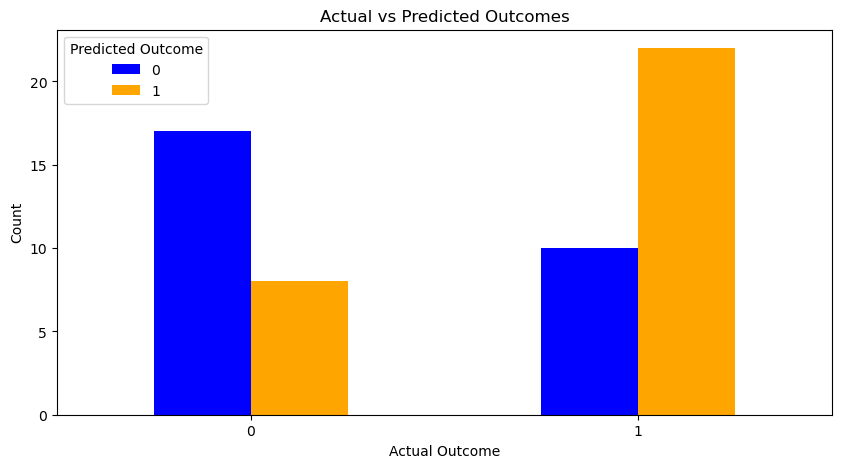

In [39]:
import matplotlib.pyplot as plt

results_count = combined.value_counts().unstack()

results_count.plot(kind='bar', figsize=(10, 5), color=['blue', 'orange'])
plt.title('Actual vs Predicted Outcomes')
plt.xlabel('Actual Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Predicted Outcome')
plt.show()